<a href="https://colab.research.google.com/github/knithwa/smsSpam/blob/main/smsSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
file='/content/spam.csv'

In [ ]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [ ]:
df=pd.read_csv('/content/spam.csv', encoding='Windows-1252')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4091,ham,I remain unconvinced that this isn't an elabor...,NaN,NaN,NaN
2814,ham,Some are lasting as much as 2 hours. You might...,NaN,NaN,NaN
2359,spam,Spook up your mob with a Halloween collection ...,NaN,NaN,NaN
475,ham,Ok I'm gonna head up to usf in like fifteen mi...,NaN,NaN,NaN
3892,ham,Have you heard from this week?,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
211,ham,Home so we can always chat
4480,ham,No..its ful of song lyrics..
1313,ham,How abt making some of the pics bigger?
400,spam,FREE RINGTONE text FIRST to 87131 for a poly o...
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
312,ham,He says he'll give me a call when his friend's...
3452,ham,Nowadays people are notixiquating the laxinorf...
174,ham,"Well, i'm gonna finish my bath now. Have a goo..."
1513,ham,Hows the champ just leaving glasgow!
167,ham,"Hi frnd, which is best way to avoid missunders..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

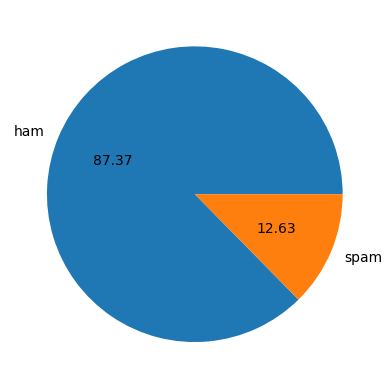

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

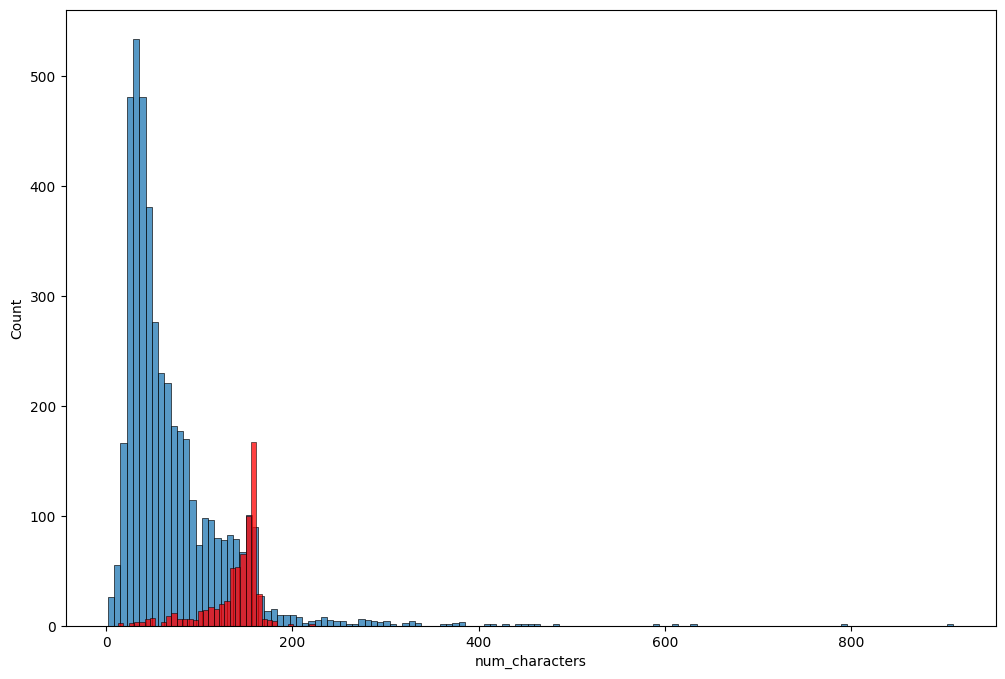

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

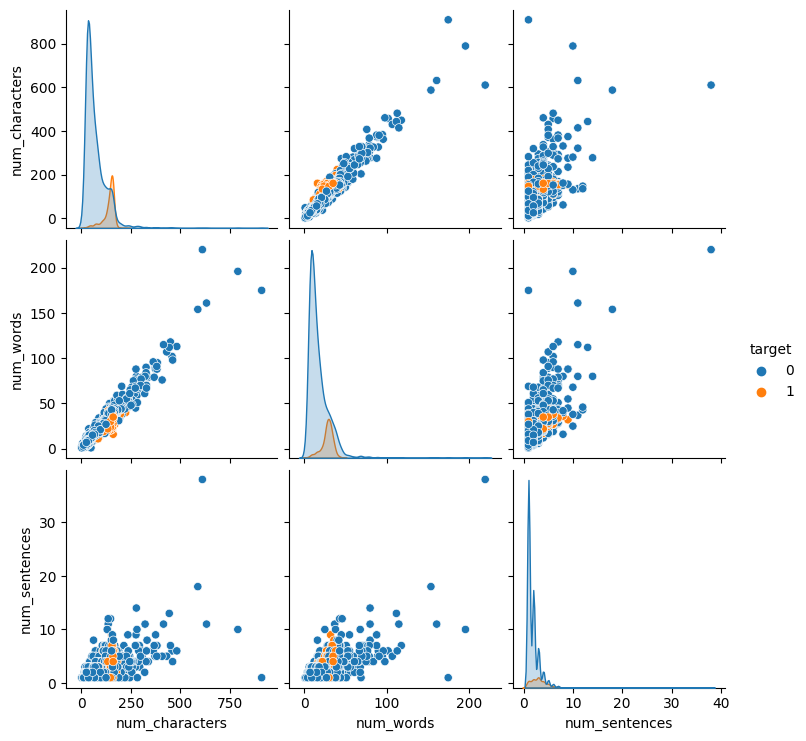

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-137-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

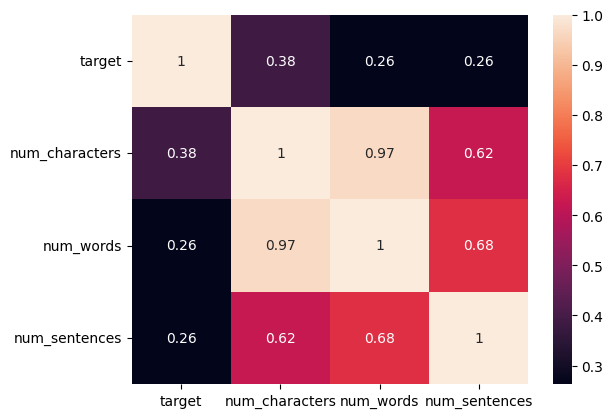

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
#import nltk
#nltk.download('stopwords')

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
transform_text('here!, yoe auhfd 34 loving')

'here yoe auhfd 34 love'

In [ ]:
df['tranformed_text']=df['text'].apply(transform_text)


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi .. avail onli in b...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do n't think he goe to usf he live aroun...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc_spam=wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=' '))

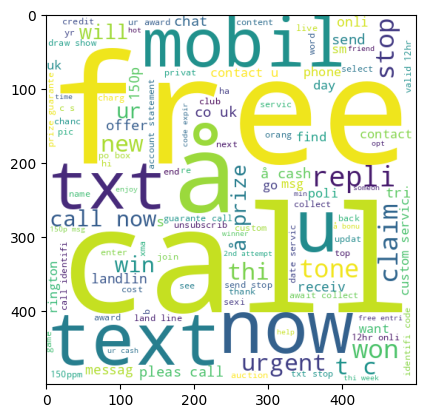

In [ ]:
plt.imshow(wc_spam)

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc_ham=wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep=' '))

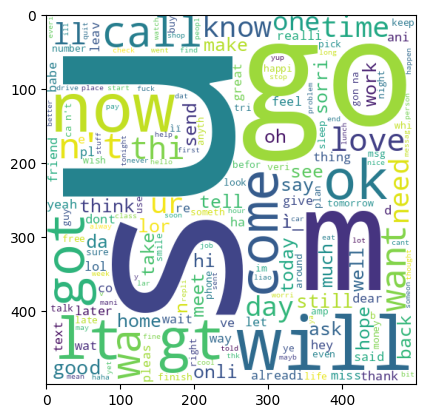

In [ ]:
plt.imshow(wc_ham)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['tranformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

15619

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['tranformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

67302

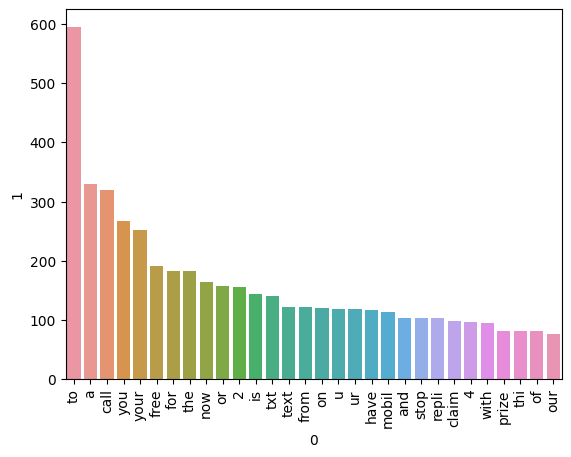

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

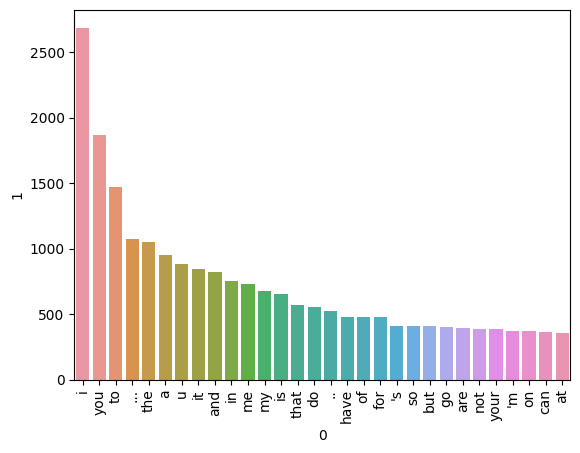

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

X=tfidf.fit_transform(df['tranformed_text']).toarray()

In [ ]:
X.shape

(5169, 7422)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[802  94]
 [ 19 119]]
0.5586854460093896


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9516441005802708
[[896   0]
 [ 50  88]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[894   2]
 [ 19 119]]
0.9834710743801653


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifer(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifer(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9833333333333333)

In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

  current_accuracy,current_precision =train_classifer(clf,X_train,y_train,X_test,y_test)

  print('For',name)
  print('Accuracy-',current_accuracy)
  print('Precision-',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For SVC
Accuracy- 0.9787234042553191
Precision- 0.9833333333333333
For KN
Accuracy- 0.8974854932301741
Precision- 1.0
For NB
Accuracy- 0.9516441005802708
Precision- 1.0
For DT
Accuracy- 0.9332688588007737
Precision- 0.8631578947368421
For LR
Accuracy- 0.9584139264990329
Precision- 0.9357798165137615
For RF
Accuracy- 0.9729206963249516
Precision- 1.0
For AdaBoost
Accuracy- 0.9748549323017408
Precision- 0.9590163934426229
For BgC
Accuracy- 0.9632495164410058
Precision- 0.890625
For ETC
Accuracy- 0.9796905222437138
Precision- 0.9834710743801653
For GBDT
Accuracy- 0.9535783365570599
Precision- 0.9591836734693877
For xgb
Accuracy- 0.9845261121856866
Precision- 0.9765625


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.897485,1.000000
2,NB,0.951644,1.000000
5,RF,0.972921,1.000000
8,ETC,0.979691,0.983471
0,SVC,0.978723,0.983333
10,xgb,0.984526,0.976562
9,GBDT,0.953578,0.959184
6,AdaBoost,0.974855,0.959016
4,LR,0.958414,0.935780
7,BgC,0.963250,0.890625


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.897485
1,NB,Accuracy,0.951644
2,RF,Accuracy,0.972921
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.978723
5,xgb,Accuracy,0.984526
6,GBDT,Accuracy,0.953578
7,AdaBoost,Accuracy,0.974855
8,LR,Accuracy,0.958414
9,BgC,Accuracy,0.963250


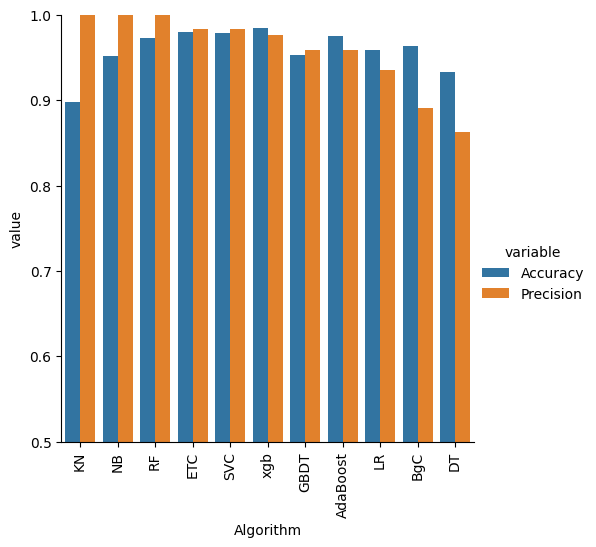

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.897485,1.000000,0.897485,1.000000,0.897485,1.000000,0.897485,1.000000
1,NB,0.951644,1.000000,0.951644,1.000000,0.951644,1.000000,0.951644,1.000000
2,RF,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
3,ETC,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471
4,SVC,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
5,xgb,0.984526,0.976562,0.984526,0.976562,0.984526,0.976562,0.984526,0.976562
6,GBDT,0.953578,0.959184,0.953578,0.959184,0.953578,0.959184,0.953578,0.959184
7,AdaBoost,0.974855,0.959016,0.974855,0.959016,0.974855,0.959016,0.974855,0.959016
8,LR,0.958414,0.935780,0.958414,0.935780,0.958414,0.935780,0.958414,0.935780
9,BgC,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988394584139265
Precision 0.9701492537313433


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))